In [1]:
# Necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Specify where to save the processed files as savepath
#path = 'H:/Downloads/PhD-Atif/Warren_2019-master'

## Loading the raw data

In [3]:
df = pd.read_csv('dat.txt', sep='\t', header=0)

In [4]:
df

,value,id,channel,patient_type,patient_id,replicate,subject_group,patrep_id,cell_id,colour,type
0,3.403409,1,SDHA,control,C02,1,Control,C02R01,C02R01_0001,#0000FF0A,mean intensity
1,3.664688,2,SDHA,control,C02,1,Control,C02R01,C02R01_0002,#0000FF0A,mean intensity
2,6.227979,3,SDHA,control,C02,1,Control,C02R01,C02R01_0003,#0000FF0A,mean intensity
3,3.478873,4,SDHA,control,C02,1,Control,C02R01,C02R01_0004,#0000FF0A,mean intensity
4,4.957944,5,SDHA,control,C02,1,Control,C02R01,C02R01_0005,#0000FF0A,mean intensity
...,...,...,...,...,...,...,...,...,...,...,...
245575,186.000000,751,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0751,#FF00000A,mean intensity
245576,141.000000,752,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0752,#FF00000A,mean intensity
245577,120.000000,753,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0753,#FF00000A,mean intensity
245578,99.000000,754,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0754,#FF00000A,mean intensity


### Exploring the categorical columns

In [5]:
df_categorical = df[['channel','patient_type','patient_id','replicate','subject_group','patrep_id','colour','type']]


In [6]:
for col in df_categorical:
    print(df_categorical[col].unique())

['SDHA' 'LOG_SDHA' 'MED_SDHA' 'NDUFB8' 'LOG_NDUFB8' 'MED_NDUFB8' 'OSCP'
 'LOG_OSCP' 'MED_OSCP' 'GRIM19' 'LOG_GRIM19' 'MED_GRIM19' 'VDAC1'
 'LOG_VDAC1' 'MED_VDAC1' 'COX4+4L2' 'LOG_COX4+4L2' 'MED_COX4+4L2' 'MTCO1'
 'LOG_MTCO1' 'MED_MTCO1' 'UqCRC2' 'LOG_UqCRC2' 'MED_UqCRC2' 'Area'
 'AspectRatio' 'Perimeter' 'Circularity' 'xCoord' 'yCoord']
['control' 'patient']
['C02' 'C01' 'C03' 'P10' 'P04' 'P02' 'P05' 'P01' 'P08' 'P03' 'P09' 'P07']
[1]
['Control' 'MT-TW' 'Deletion' 'CI' 'MT-TL1' 'MT-TG' 'MT-TE']
['C02R01' 'C01R01' 'C03R01' 'P10R01' 'P04R01' 'P02R01' 'P05R01' 'P01R01'
 'P08R01' 'P03R01' 'P09R01' 'P07R01']
['#0000FF0A' '#FF00000A']
['mean intensity' 'log mean intensity' 'median intensity' 'area'
 'aspect ratio' 'perimeter' 'circularity']


In [7]:
df['channel'] = df['channel'].str.replace('GRIM19','NDUFA13')

In [8]:
df.channel.unique()

array(['SDHA', 'LOG_SDHA', 'MED_SDHA', 'NDUFB8', 'LOG_NDUFB8',
       'MED_NDUFB8', 'OSCP', 'LOG_OSCP', 'MED_OSCP', 'NDUFA13',
       'LOG_NDUFA13', 'MED_NDUFA13', 'VDAC1', 'LOG_VDAC1', 'MED_VDAC1',
       'COX4+4L2', 'LOG_COX4+4L2', 'MED_COX4+4L2', 'MTCO1', 'LOG_MTCO1',
       'MED_MTCO1', 'UqCRC2', 'LOG_UqCRC2', 'MED_UqCRC2', 'Area',
       'AspectRatio', 'Perimeter', 'Circularity', 'xCoord', 'yCoord'],
      dtype=object)

In [9]:
df.groupby('patient_id').cell_id.nunique()

patient_id
C01     148
C02     289
C03     131
P01     337
P02     232
P03    1361
P04     879
P05    1878
P07     755
P08     628
P09     946
P10     602
Name: cell_id, dtype: int64

## Reshaping the dataframe 

In [10]:
#df1=df.pivot(index=['cell_id','subject_group'], columns = ['channel'],values =['value'])

df1= pd.pivot_table(df, index=['cell_id','patient_type','subject_group','patient_id','colour'], columns = ['channel'],values =['value'])

In [11]:
pd.set_option('display.max_columns', None)
df1

value  \
channel                                                        Area   
cell_id     patient_type subject_group patient_id colour              
C01R01_0001 control      Control       C01        #0000FF0A   879.0   
C01R01_0002 control      Control       C01        #0000FF0A  2556.0   
C01R01_0003 control      Control       C01        #0000FF0A  6432.0   
C01R01_0004 control      Control       C01        #0000FF0A  3072.0   
C01R01_0005 control      Control       C01        #0000FF0A  8734.5   
...                                                             ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A  1858.0   
P10R01_0599 patient      MT-TW         P10        #FF00000A  3970.5   
P10R01_0600 patient      MT-TW         P10        #FF00000A  1458.0   
P10R01_0601 patient      MT-TW         P10        #FF00000A  1276.5   
P10R01_0602 patient      MT-TW         P10        #FF00000A  1339.5   

                                                                         \
channel                                                     AspectRatio   
cell_id     patient_type subject_group patient_id colour                  
C01R01_0001 control      Control       C01        #0000FF0A    0.448980   
C01R01_0002 control      Control       C01        #0000FF0A    0.876923   
C01R01_0003 control      Control       C01        #0000FF0A    0.800000   
C01R01_0004 control      Control       C01        #0000FF0A    1.157143   
C01R01_0005 control      Control       C01        #0000FF0A    1.595238   
...                                                                 ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A    2.000000   
P10R01_0599 patient      MT-TW         P10        #FF00000A    1.451613   
P10R01_0600 patient      MT-TW         P10        #FF00000A    2.900000   
P10R01_0601 patient      MT-TW         P10        #FF00000A    3.133333   
P10R01_0602 patient      MT-TW         P10        #FF00000A    1.555556   

                                                                        \
channel                                                       COX4+4L2   
cell_id     patient_type subject_group patient_id colour                 
C01R01_0001 control      Control       C01        #0000FF0A   4.926230   
C01R01_0002 control      Control       C01        #0000FF0A   9.064356   
C01R01_0003 control      Control       C01        #0000FF0A   7.408696   
C01R01_0004 control      Control       C01        #0000FF0A   8.756881   
C01R01_0005 control      Control       C01        #0000FF0A   5.994460   
...                                                                ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A   8.157025   
P10R01_0599 patient      MT-TW         P10        #FF00000A   8.354244   
P10R01_0600 patient      MT-TW         P10        #FF00000A  13.741228   
P10R01_0601 patient      MT-TW         P10        #FF00000A  15.060748   
P10R01_0602 patient      MT-TW         P10        #FF00000A   7.575000   

                                                                         \
channel                                                     Circularity   
cell_id     patient_type subject_group patient_id colour                  
C01R01_0001 control      Control       C01        #0000FF0A    0.667624   
C01R01_0002 control      Control       C01        #0000FF0A    0.662271   
C01R01_0003 control      Control       C01        #0000FF0A    0.484423   
C01R01_0004 control      Control       C01        #0000FF0A    0.608063   
C01R01_0005 control      Control       C01        #0000FF0A    0.705084   
...                                                                 ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A    0.240837   
P10R01_0599 patient      MT-TW         P10        #FF00000A    0.409971   
P10R01_0600 patient      MT-TW         P10        #FF00000A    0.198452   
P10R01_0601 patient      MT-TW         P10        #FF00000A    0.228461   
P10R

In [12]:
df2= df1.reset_index()

In [13]:
df2

cell_id patient_type subject_group patient_id     colour   value  \
channel                                                                  Area   
0        C01R01_0001      control       Control        C01  #0000FF0A   879.0   
1        C01R01_0002      control       Control        C01  #0000FF0A  2556.0   
2        C01R01_0003      control       Control        C01  #0000FF0A  6432.0   
3        C01R01_0004      control       Control        C01  #0000FF0A  3072.0   
4        C01R01_0005      control       Control        C01  #0000FF0A  8734.5   
...              ...          ...           ...        ...        ...     ...   
8181     P10R01_0598      patient         MT-TW        P10  #FF00000A  1858.0   
8182     P10R01_0599      patient         MT-TW        P10  #FF00000A  3970.5   
8183     P10R01_0600      patient         MT-TW        P10  #FF00000A  1458.0   
8184     P10R01_0601      patient         MT-TW        P10  #FF00000A  1276.5   
8185     P10R01_0602      patient         MT-TW        P10  #FF00000A  1339.5   

                                                                               \
channel AspectRatio   COX4+4L2 Circularity LOG_COX4+4L2 LOG_MTCO1 LOG_NDUFA13   
0          0.448980   4.926230    0.667624     3.528312  1.512562    1.718303   
1          0.876923   9.064356    0.662271     6.656274  1.763175    2.777602   
2          0.800000   7.408696    0.484423     5.569829  1.652074    2.207175   
3          1.157143   8.756881    0.608063     7.275473  1.843152    2.923391   
4          1.595238   5.994460    0.705084     4.253457  1.421162    1.760127   
...             ...        ...         ...          ...       ...         ...   
8181       2.000000   8.157025    0.240837     6.455170  1.407893    1.904649   
8182       1.451613   8.354244    0.409971     7.325609  1.150830    1.477179   
8183       2.900000  13.741228    0.198452    11.432586  1.307792    1.628173   
8184       3.133333  15.060748    0.228461    13.320255  1.817468    3.064791   
8185       1.555556   7.575000    0.240358     6.022850  1.099101    1.324772   

                                                                            \
channel LOG_NDUFB8   LOG_OSCP   LOG_SDHA LOG_UqCRC2 LOG_VDAC1 MED_COX4+4L2   
0         1.926028   2.092291   2.498110   2.793981  1.574617          4.0   
1         2.671580   2.926415   4.195481   4.720006  1.753394          7.0   
2         2.160935   2.409333   3.632043   3.797937  1.552955          6.0   
3         2.566386   2.976915   4.496332   4.825183  1.750554          8.0   
4         1.769816   2.003908   2.789748   2.704791  1.469509          4.0   
...            ...        ...        ...        ...       ...          ...   
8181      1.519806  10.240695  13.661039  10.582099  2.976675          7.0   
8182      1.191700  21.188446  44.385100  14.004130  5.544963          8.0   
8183      1.312752  40.187626  63.152782  28.195734  9.497522         12.0   
8184      2.606018   4.084147   5.848844   8.787500  2.405839         14.0   
8185      1.206204  14.693705  33.566143   9.559546  4.394516          6.0   

                                                                       \
channel MED_MTCO1 MED_NDUFA13 MED_NDUFB8 MED_OSCP MED_SDHA MED_UqCRC2   
0             1.0         2.0        2.0      2.0      2.0        3.0   
1             2.0         3.0        3.0      3.0      4.0        5.0   
2             2.0         2.0        2.0      2.0      4.0        4.0   
3             2.0         3.0        3.0      3.0      5.0        5.0   
4             1.0         2.0        2.0      2.0      3.0        3.0   
...           ...         ...        ...      ...      ...        ...   
8181          1.0         2.0        1.0     11.0     15.0       10.0   
8182          1.0         1.0        1.0     23.0     47.0       15.0   
8183          1.0         1.0        1.0     41.0     62.0       30.0   
8184          2.0         3.0        3.0      4.0      6.0        9.0   
8185          

In [14]:
df2= df2.rename(columns={"value":""})

In [15]:
list(df2.columns)

[('cell_id', ''),
 ('patient_type', ''),
 ('subject_group', ''),
 ('patient_id', ''),
 ('colour', ''),
 ('', 'Area'),
 ('', 'AspectRatio'),
 ('', 'COX4+4L2'),
 ('', 'Circularity'),
 ('', 'LOG_COX4+4L2'),
 ('', 'LOG_MTCO1'),
 ('', 'LOG_NDUFA13'),
 ('', 'LOG_NDUFB8'),
 ('', 'LOG_OSCP'),
 ('', 'LOG_SDHA'),
 ('', 'LOG_UqCRC2'),
 ('', 'LOG_VDAC1'),
 ('', 'MED_COX4+4L2'),
 ('', 'MED_MTCO1'),
 ('', 'MED_NDUFA13'),
 ('', 'MED_NDUFB8'),
 ('', 'MED_OSCP'),
 ('', 'MED_SDHA'),
 ('', 'MED_UqCRC2'),
 ('', 'MED_VDAC1'),
 ('', 'MTCO1'),
 ('', 'NDUFA13'),
 ('', 'NDUFB8'),
 ('', 'OSCP'),
 ('', 'Perimeter'),
 ('', 'SDHA'),
 ('', 'UqCRC2'),
 ('', 'VDAC1'),
 ('', 'xCoord'),
 ('', 'yCoord')]

In [16]:
df2.columns = [f'{i}{j}' for i, j in df2.columns]
df2.columns = df2.columns.map(''.join)
#df2.columns = df2.columns.map('{0[0]}{0[1]}'.format) 

In [17]:
df2

,cell_id,patient_type,subject_group,patient_id,colour,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord
0,C01R01_0001,control,Control,C01,#0000FF0A,879.0,0.448980,4.926230,0.667624,3.528312,1.512562,1.718303,1.926028,2.092291,2.498110,2.793981,1.574617,4.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.737705,2.122951,2.409836,2.573770,128.627417,3.131148,3.377049,1.778689,704.0,1710.0
1,C01R01_0002,control,Control,C01,#0000FF0A,2556.0,0.876923,9.064356,0.662271,6.656274,1.763175,2.777602,2.671580,2.926415,4.195481,4.720006,1.753394,7.0,2.0,3.0,3.0,3.0,4.0,5.0,2.0,2.143564,3.608911,3.301980,3.752475,220.225396,5.202970,5.737624,2.049505,717.0,1651.0
2,C01R01_0003,control,Control,C01,#0000FF0A,6432.0,0.800000,7.408696,0.484423,5.569829,1.652074,2.207175,2.160935,2.409333,3.632043,3.797937,1.552955,6.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,1.918841,2.739130,2.646377,2.968116,408.475175,4.539130,4.681159,1.791304,775.0,1647.0
3,C01R01_0004,control,Control,C01,#0000FF0A,3072.0,1.157143,8.756881,0.608063,7.275473,1.843152,2.923391,2.566386,2.976915,4.496332,4.825183,1.750554,8.0,2.0,3.0,3.0,3.0,5.0,5.0,2.0,2.165138,3.577982,3.077982,3.550459,251.965509,5.399083,5.678899,2.045872,731.0,1595.0
4,C01R01_0005,control,Control,C01,#0000FF0A,8734.5,1.595238,5.994460,0.705084,4.253457,1.421162,1.760127,1.769816,2.003908,2.789748,2.704791,1.469509,4.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,1.617729,2.227147,2.160665,2.509695,394.551296,3.684211,3.498615,1.692521,905.0,1570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,P10R01_0598,patient,MT-TW,P10,#FF00000A,1858.0,2.000000,8.157025,0.240837,6.455170,1.407893,1.904649,1.519806,10.240695,13.661039,10.582099,2.976675,7.0,1.0,2.0,1.0,11.0,15.0,10.0,3.0,1.574380,2.371901,1.768595,12.285124,311.362478,16.578512,12.888430,3.611570,1135.0,91.0
8182,P10R01_0599,patient,MT-TW,P10,#FF00000A,3970.5,1.451613,8.354244,0.409971,7.325609,1.150830,1.477179,1.191700,21.188446,44.385100,14.004130,5.544963,8.0,1.0,1.0,1.0,23.0,47.0,15.0,6.0,1.210332,1.638376,1.291513,24.623616,348.859952,49.250923,16.025830,6.483395,910.0,88.0
8183,P10R01_0600,patient,MT-TW,P10,#FF00000A,1458.0,2.900000,13.741228,0.198452,11.432586,1.307792,1.628173,1.312752,40.187626,63.152782,28.195734,9.497522,12.0,1.0,1.0,1.0,41.0,62.0,30.0,10.0,1.434211,1.925439,1.434211,48.171053,303.847760,73.495614,32.982456,11.657895,1004.0,63.0
8184,P10R01_0601,patient,MT-TW,P10,#FF00000A,1276.5,3.133333,15.060748,0.228461,13.320255,1.817468,3.064791,2.606018,4.084147,5.848844,8.787500,2.405839,14.0,2.0,3.0,3.0,4.0,6.0,9.0,2.0,2.135514,3.644860,3.056075,5.051402,264.977702,7.032710,10.261682,2.957944,1079.0,58.0


### Adding polar tranformation terms "Theta" & radius

In [18]:
df2['RADIUS_COX4+4L2']= ((df2['LOG_VDAC1']**(2))+(df2['LOG_COX4+4L2']**(2)))**(1/2)

In [19]:
df2['THETA_COX4+4L2']= (np.arctan((df2['LOG_COX4+4L2']/df2['LOG_VDAC1'])) ) *360 /(2*np.pi)

In [20]:
df2['RADIUS_MTCO1']= ((df2.LOG_VDAC1**(2))+(df2.LOG_MTCO1**(2)))**(1/2)
df2['THETA_MTCO1']= (np.arctan((df2.LOG_MTCO1/df2.LOG_VDAC1)) ) *360 /(2*np.pi)

df2['RADIUS_NDUFA13']= ((df2.LOG_VDAC1**(2))+(df2.LOG_NDUFA13**(2)))**(1/2)
df2['THETA_NDUFA13']= (np.arctan((df2.LOG_NDUFA13/df2.LOG_VDAC1)) ) *360 /(2*np.pi)

df2['RADIUS_NDUFB8']= ((df2.LOG_VDAC1**(2))+(df2.LOG_NDUFB8**(2)))**(1/2)
df2['THETA_NDUFB8']= (np.arctan((df2.LOG_NDUFB8/df2.LOG_VDAC1)) ) *360 /(2*np.pi)

df2['RADIUS_OSCP']= ((df2.LOG_VDAC1**(2))+(df2.LOG_OSCP**(2)))**(1/2)
df2['THETA_OSCP']= (np.arctan((df2.LOG_OSCP/df2.LOG_VDAC1)) ) *360 /(2*np.pi)

df2['RADIUS_SDHA']= ((df2.LOG_VDAC1**(2))+(df2.LOG_SDHA**(2)))**(1/2)
df2['THETA_SDHA']= (np.arctan((df2.LOG_SDHA/df2.LOG_VDAC1)) ) *360 /(2*np.pi)

df2['RADIUS_UqCRC2']= ((df2.LOG_VDAC1**(2))+(df2.LOG_UqCRC2**(2)))**(1/2)
df2['THETA_UqCRC2']= (np.arctan((df2.LOG_UqCRC2/df2.LOG_VDAC1)) ) *360 /(2*np.pi)

In [21]:
df2

,cell_id,patient_type,subject_group,patient_id,colour,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord,RADIUS_COX4+4L2,THETA_COX4+4L2,RADIUS_MTCO1,THETA_MTCO1,RADIUS_NDUFA13,THETA_NDUFA13,RADIUS_NDUFB8,THETA_NDUFB8,RADIUS_OSCP,THETA_OSCP,RADIUS_SDHA,THETA_SDHA,RADIUS_UqCRC2,THETA_UqCRC2
0,C01R01_0001,control,Control,C01,#0000FF0A,879.0,0.448980,4.926230,0.667624,3.528312,1.512562,1.718303,1.926028,2.092291,2.498110,2.793981,1.574617,4.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.737705,2.122951,2.409836,2.573770,128.627417,3.131148,3.377049,1.778689,704.0,1710.0,3.863730,65.949721,2.183407,43.848458,2.330662,47.498496,2.487771,50.732414,2.618607,53.035596,2.952960,57.775808,3.207140,60.595488
1,C01R01_0002,control,Control,C01,#0000FF0A,2556.0,0.876923,9.064356,0.662271,6.656274,1.763175,2.777602,2.671580,2.926415,4.195481,4.720006,1.753394,7.0,2.0,3.0,3.0,3.0,4.0,5.0,2.0,2.143564,3.608911,3.301980,3.752475,220.225396,5.202970,5.737624,2.049505,717.0,1651.0,6.883341,75.242407,2.486600,45.159362,3.284732,57.737344,3.195580,56.722564,3.411495,59.071598,4.547137,67.318757,5.035161,69.620909
2,C01R01_0003,control,Control,C01,#0000FF0A,6432.0,0.800000,7.408696,0.484423,5.569829,1.652074,2.207175,2.160935,2.409333,3.632043,3.797937,1.552955,6.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,1.918841,2.739130,2.646377,2.968116,408.475175,4.539130,4.681159,1.791304,775.0,1647.0,5.782272,74.420706,2.267381,46.771375,2.698757,54.870020,2.661073,54.297107,2.866454,57.195878,3.950115,66.849875,4.103169,67.760627
3,C01R01_0004,control,Control,C01,#0000FF0A,3072.0,1.157143,8.756881,0.608063,7.275473,1.843152,2.923391,2.566386,2.976915,4.496332,4.825183,1.750554,8.0,2.0,3.0,3.0,3.0,5.0,5.0,2.0,2.165138,3.577982,3.077982,3.550459,251.965509,5.399083,5.678899,2.045872,731.0,1595.0,7.483111,76.471208,2.541977,46.475998,3.407441,59.086436,3.106569,55.701766,3.453471,59.542647,4.825084,68.727580,5.132916,70.059467
4,C01R01_0005,control,Control,C01,#0000FF0A,8734.5,1.595238,5.994460,0.705084,4.253457,1.421162,1.760127,1.769816,2.003908,2.789748,2.704791,1.469509,4.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,1.617729,2.227147,2.160665,2.509695,394.551296,3.684211,3.498615,1.692521,905.0,1570.0,4.500150,70.940694,2.044299,44.041803,2.292925,50.141895,2.300370,50.296555,2.484976,53.746603,3.153118,62.221833,3.078206,61.484830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,P10R01_0598,patient,MT-TW,P10,#FF00000A,1858.0,2.000000,8.157025,0.240837,6.455170,1.407893,1.904649,1.519806,10.240695,13.661039,10.582099,2.976675,7.0,1.0,2.0,1.0,11.0,15.0,10.0,3.0,1.574380,2.371901,1.768595,12.285124,311.362478,16.578512,12.888430,3.611570,1135.0,91.0,7.108432,65.244141,3.292834,25.312990,3.533876,32.613470,3.342215,27.047567,10.664541,73.792376,13.981580,77.707662,10.992789,74.289058
8182,P10R01_0599,patient,MT-TW,P10,#FF00000A,3970.5,1.451613,8.354244,0.409971,7.325609,1.150830,1.477179,1.191700,21.188446,44.385100,14.004130,5.544963,8.0,1.0,1.0,1.0,23.0,47.0,15.0,6.0,1.210332,1.638376,1.291513,24.623616,348.859952,49.250923,16.025830,6.483395,910.0,88.0,9.187554,52.876878,5.663128,11.724998,5.738351,14.917162,5.671575,12.129266,21.901983,75.334721,44.730121,82.879019,15.061948,68.398813
8183,P10R01_0600,patient,MT-TW,P10,#FF00000A,1458.0,2.900000,13.741228,0.198452,11.432586,1.307792,1.628173,1.312752,40.187626,63.152782,28.195734,9.497522,12.0,1.0,1.0,1.0,41.0,62.0,30.0,10.0,1.434211,1.925439,1.434211,48.171053,303.847760,73.495614,32.982456,11.657895,1004.0,63.0,14.862939,50.282186,9.587139,7.840222,9.636071,9.727733,9.587817,7.869584,41.294651,76.703281,63.862953,81.447404,29.752350,71.384287
8184,P10R01_0601,patient,MT-TW,P

In [22]:
df = df2

## EDA 

In [23]:
df_eda = df

<AxesSubplot:>

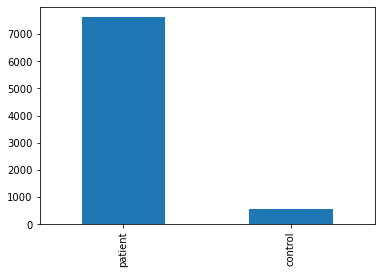

In [24]:
df_eda.patient_type.value_counts().plot(kind='bar')

<AxesSubplot:>

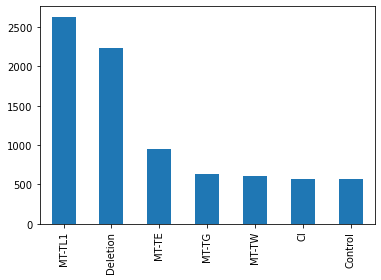

In [25]:
df_eda.subject_group.value_counts().plot(kind='bar')

In [26]:
df_eda.subject_group.value_counts()

MT-TL1      2633
Deletion    2240
MT-TE        946
MT-TG        628
MT-TW        602
CI           569
Control      568
Name: subject_group, dtype: int64

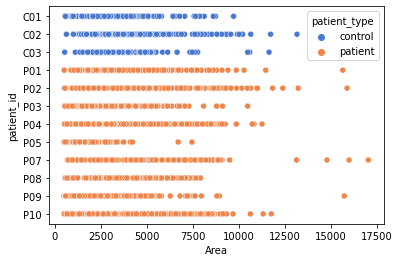

In [27]:
ax = sns.scatterplot(x="Area", y="patient_id", hue="patient_type", palette='muted',data=df_eda)

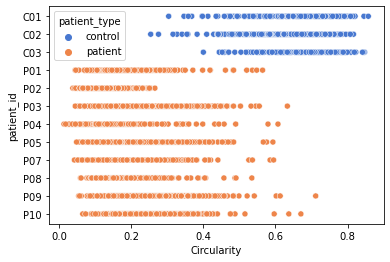

In [28]:
ax = sns.scatterplot(x="Circularity", y="patient_id", hue="patient_type", palette='muted',data=df_eda)

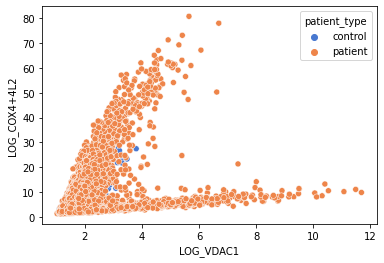

In [29]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_COX4+4L2", hue="patient_type", palette='muted',data=df_eda)

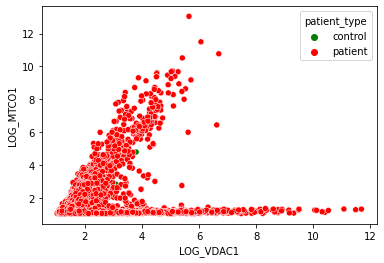

In [30]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_MTCO1", hue="patient_type", palette=['green','red'], data=df_eda)

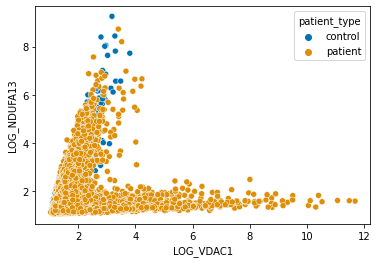

In [31]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_NDUFA13", hue="patient_type",palette='colorblind', data=df_eda)

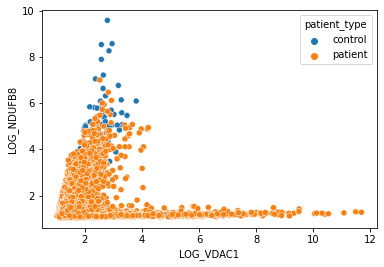

In [32]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_NDUFB8", hue="patient_type", data=df_eda)

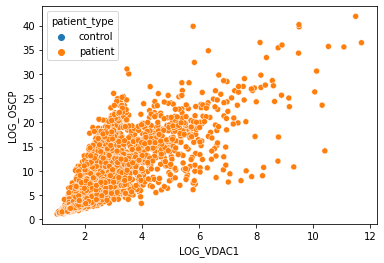

In [33]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_OSCP", hue="patient_type", data=df_eda)

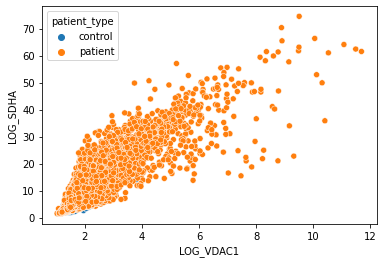

In [34]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_SDHA", hue="patient_type", data=df_eda)

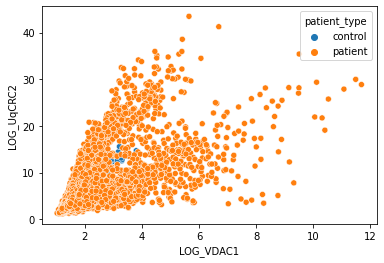

In [35]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_UqCRC2", hue="patient_type", data=df_eda)

In [36]:
df_control= df_eda.patient_type=='control'

In [37]:
df_control

0        True
1        True
2        True
3        True
4        True
        ...  
8181    False
8182    False
8183    False
8184    False
8185    False
Name: patient_type, Length: 8186, dtype: bool

## Machine Learning

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Data Preparation with random training/test split

In [39]:
X = df[['subject_group','Area', 'Perimeter', 'Circularity', 'MED_COX4+4L2','MED_MTCO1', 'MED_NDUFA13', 'MED_NDUFB8', 'MED_OSCP', 'MED_SDHA', 'MED_UqCRC2', 'MED_VDAC1'  ]]
labels = df[['patient_type']]

In [40]:
train_x, test_x, train_y,test_y = train_test_split(X,labels, train_size=.75)
print("Train X: {} | Train Y: {}".format(train_x.shape,train_y.shape))
print("Test X:  {} | Test Y:  {}".format(test_x.shape,test_y.shape))

Train X: (6139, 12) | Train Y: (6139, 1)
Test X:  (2047, 12) | Test Y:  (2047, 1)


### Binary Class

In [41]:
clf = RandomForestClassifier(n_jobs=10 , random_state=0)
clf.fit(train_x, train_y)

ValueError: could not convert string to float: 'MT-TE'

In [ ]:
clf.predict(test_x)

In [ ]:
print(classification_report(test_y, clf.predict(test_x)))

In [42]:
importances = clf.feature_importances_

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [43]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], train_x.columns[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

## Multiclass

In [44]:
# multi class

X = df[['Area', 'Perimeter', 'Circularity', 'MED_COX4+4L2','MED_MTCO1', 'MED_NDUFA13', 'MED_NDUFB8', 'MED_OSCP', 'MED_SDHA', 'MED_UqCRC2', 'MED_VDAC1'   ]]
labels = df[['subject_group']]



In [45]:
train_x, test_x, train_y,test_y = train_test_split(X,labels, train_size=.75)
print("Train X: {} | Train Y: {}".format(train_x.shape,train_y.shape))
print("Test X:  {} | Test Y:  {}".format(test_x.shape,test_y.shape))

Train X: (6139, 11) | Train Y: (6139, 1)
Test X:  (2047, 11) | Test Y:  (2047, 1)


In [46]:
clf = RandomForestClassifier(n_jobs=10 , random_state=0)
clf.fit(train_x, train_y)

clf.predict(test_x)

<ipython-input-46-5a7ef9a788bc>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


array(['CI', 'Deletion', 'MT-TL1', ..., 'Deletion', 'MT-TL1', 'MT-TL1'],
      dtype=object)

In [47]:
print(classification_report(test_y, clf.predict(test_x)))

              precision    recall  f1-score   support

          CI       0.99      0.97      0.98       144
     Control       0.92      0.96      0.94       124
    Deletion       0.86      0.89      0.88       568
       MT-TE       0.87      0.76      0.81       239
       MT-TG       0.95      0.84      0.89       167
      MT-TL1       0.86      0.92      0.89       647
       MT-TW       0.89      0.82      0.85       158

    accuracy                           0.88      2047
   macro avg       0.91      0.88      0.89      2047
weighted avg       0.88      0.88      0.88      2047



In [48]:
importances = clf.feature_importances_

In [49]:
importances

array([0.1204547 , 0.09633371, 0.1700817 , 0.13399737, 0.0482917 ,
       0.04474497, 0.0491959 , 0.0936924 , 0.09332093, 0.10566723,
       0.0442194 ])

Feature ranking:
1. feature 2 Area (0.170082)
2. feature 3 Perimeter (0.133997)
3. feature 0 Circularity (0.120455)
4. feature 9 MED_COX4+4L2 (0.105667)
5. feature 1 MED_MTCO1 (0.096334)
6. feature 7 MED_NDUFA13 (0.093692)
7. feature 8 MED_NDUFB8 (0.093321)
8. feature 6 MED_OSCP (0.049196)
9. feature 4 MED_SDHA (0.048292)
10. feature 5 MED_UqCRC2 (0.044745)
11. feature 10 MED_VDAC1 (0.044219)


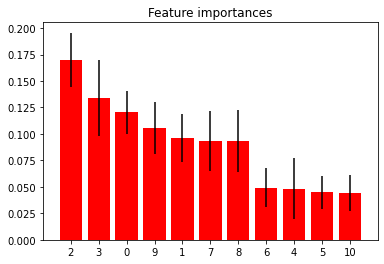

In [50]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Data preparation with 7 individuals for training and 4 for testing

In [51]:
#dfx = df[['patient_type','subject_group','patient_id','Area', 'AspectRatio','xCoord', 'yCoord', 'Perimeter', 'Circularity', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1'  ]]
dfx = df.drop(['colour','cell_id'],1)

In [52]:
dfx.groupby(['patient_id','subject_group']).sum()

,,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord,RADIUS_COX4+4L2,THETA_COX4+4L2,RADIUS_MTCO1,THETA_MTCO1,RADIUS_NDUFA13,THETA_NDUFA13,RADIUS_NDUFB8,THETA_NDUFB8,RADIUS_OSCP,THETA_OSCP,RADIUS_SDHA,THETA_SDHA,RADIUS_UqCRC2,THETA_UqCRC2
patient_id,subject_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C01,Control,524856.5,150.294051,972.840210,94.725050,745.607207,236.448186,323.721248,353.219669,376.157366,462.222402,452.209393,236.573276,830.0,212.0,320.0,361.0,385.0,482.5,471.0,221.5,275.896367,403.242101,433.858938,468.939813,38427.744631,573.672018,558.747972,271.550313,58059.0,148026.0,784.578561,10508.251268,334.806407,6642.909539,402.146690,7857.356865,426.443762,8196.736290,445.532372,8445.929550,520.668898,9187.147873,511.763636,9131.490884
C02,Control,1174800.5,368.771926,1227.817764,180.458779,1027.859492,380.268620,501.004295,474.239422,510.083149,893.813215,647.589969,370.075045,1094.5,315.5,465.5,439.0,477.5,935.0,661.5,301.5,416.733508,578.233315,542.663546,590.321343,81412.510823,1059.137439,763.332130,402.095998,512825.0,482360.0,1098.170513,19669.519163,530.864459,13210.256986,624.754502,15246.813903,603.011332,14858.372521,631.767747,15424.555715,971.257500,19078.413520,748.034433,17156.612951
C03,Control,481692.5,141.785352,2036.848784,87.741770,1690.147813,352.455570,584.549963,571.591513,720.929153,1033.275590,980.365193,321.414336,1866.5,369.0,624.0,604.0,775.0,1120.0,1050.0,332.5,426.458354,725.191976,694.856077,881.381261,33994.527794,1232.013367,1165.745728,382.259552,208729.0,77381.0,1724.688533,10132.843919,479.113421,6124.500746,670.916161,7802.233831,659.129638,7795.830445,792.604385,8449.260761,1085.465106,9325.043113,1035.718798,9186.720300
P01,CI,1308879.0,467.008478,10378.764847,59.223580,8460.343891,1199.110856,485.915645,388.051289,3550.721311,5699.674541,4955.285318,789.330066,9343.0,1265.5,372.5,337.0,3981.5,6215.5,5436.0,809.0,1482.961167,550.121604,411.222357,4490.924642,185169.178234,6885.889763,6099.997519,949.602696,232945.0,340215.0,8498.920447,28384.356911,1437.565465,18985.589963,929.539962,10895.067088,882.670751,9117.537440,3640.314102,25835.583695,5756.126504,27511.754952,5020.459754,27052.674297
P02,CI,1175212.0,222.023427,12168.335817,29.655498,9782.834394,1394.256148,362.230953,266.846775,3319.939700,5296.630420,5088.172703,817.535741,10485.5,1494.5,337.0,232.0,3605.0,5717.0,5454.5,846.5,1749.648205,418.761484,283.325387,4247.886537,164904.877028,6509.541718,6397.370979,1016.762177,298486.0,305612.0,9818.539468,19674.642024,1620.780319,13662.394935,896.635600,5798.786803,862.997862,4508.147798,3423.722257,17420.420930,5362.016640,18709.729772,5156.340530,18625.130504
P03,Deletion,3040044.5,1739.949067,6906.627729,353.871404,5461.167314,1899.446604,2564.548215,2491.586204,2527.466443,4181.503078,3655.438967,1852.582924,5788.5,1564.5,2444.5,2397.5,2432.0,4328.5,3747.0,1477.5,2124.932320,3065.601479,2952.650492,3018.588234,454623.600792,5100.236849,4490.086160,2053.368994,2545124.0,1741793.0,5793.755270,94458.150751,2656.759985,62059.827150,3175.141142,72682.084866,3117.323678,71611.175982,3139.078493,72559.701625,4585.509477,88639.459848,4110.012399,84674.856034
P04,Deletion,3765579.0,1583.643156,15233.687463,98.801928,12972.582069,2178.984609,3100.002100,2106.111081,4461.738456,7367.483510,6440.946247,1740.043017,13993.5,2236.5,3285.5,2179.5,4789.5,7856.5,6816.5,1760.0,2570.292580,3737.854262,2490.894393,5384.684726,654752.182949,8649.351920,7522.112572,2015.320942,1197027.0,1200604.0,13111.515473,71038.404346,2802.257167,44550.934062,3571.528132,52440.963311,2740.892715,43966.458495,4797.622290,59672.214934,7578.543050,66740.220822,6679.208084,65202.391998
P05,MT-TL1,2434612.5,2694.704853,16814.093617,453.132383,13086.378299,3094.401080,3837.644831,3

In [53]:
X_train = dfx[dfx.patient_id != "P02"]
X_train = X_train[X_train.patient_id != "P04"]
X_train = X_train[X_train.patient_id != "P07"]
X_train = X_train[X_train.patient_id != "C02"]
X_train

,patient_type,subject_group,patient_id,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord,RADIUS_COX4+4L2,THETA_COX4+4L2,RADIUS_MTCO1,THETA_MTCO1,RADIUS_NDUFA13,THETA_NDUFA13,RADIUS_NDUFB8,THETA_NDUFB8,RADIUS_OSCP,THETA_OSCP,RADIUS_SDHA,THETA_SDHA,RADIUS_UqCRC2,THETA_UqCRC2
0,control,Control,C01,879.0,0.448980,4.926230,0.667624,3.528312,1.512562,1.718303,1.926028,2.092291,2.498110,2.793981,1.574617,4.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.737705,2.122951,2.409836,2.573770,128.627417,3.131148,3.377049,1.778689,704.0,1710.0,3.863730,65.949721,2.183407,43.848458,2.330662,47.498496,2.487771,50.732414,2.618607,53.035596,2.952960,57.775808,3.207140,60.595488
1,control,Control,C01,2556.0,0.876923,9.064356,0.662271,6.656274,1.763175,2.777602,2.671580,2.926415,4.195481,4.720006,1.753394,7.0,2.0,3.0,3.0,3.0,4.0,5.0,2.0,2.143564,3.608911,3.301980,3.752475,220.225396,5.202970,5.737624,2.049505,717.0,1651.0,6.883341,75.242407,2.486600,45.159362,3.284732,57.737344,3.195580,56.722564,3.411495,59.071598,4.547137,67.318757,5.035161,69.620909
2,control,Control,C01,6432.0,0.800000,7.408696,0.484423,5.569829,1.652074,2.207175,2.160935,2.409333,3.632043,3.797937,1.552955,6.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,1.918841,2.739130,2.646377,2.968116,408.475175,4.539130,4.681159,1.791304,775.0,1647.0,5.782272,74.420706,2.267381,46.771375,2.698757,54.870020,2.661073,54.297107,2.866454,57.195878,3.950115,66.849875,4.103169,67.760627
3,control,Control,C01,3072.0,1.157143,8.756881,0.608063,7.275473,1.843152,2.923391,2.566386,2.976915,4.496332,4.825183,1.750554,8.0,2.0,3.0,3.0,3.0,5.0,5.0,2.0,2.165138,3.577982,3.077982,3.550459,251.965509,5.399083,5.678899,2.045872,731.0,1595.0,7.483111,76.471208,2.541977,46.475998,3.407441,59.086436,3.106569,55.701766,3.453471,59.542647,4.825084,68.727580,5.132916,70.059467
4,control,Control,C01,8734.5,1.595238,5.994460,0.705084,4.253457,1.421162,1.760127,1.769816,2.003908,2.789748,2.704791,1.469509,4.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,1.617729,2.227147,2.160665,2.509695,394.551296,3.684211,3.498615,1.692521,905.0,1570.0,4.500150,70.940694,2.044299,44.041803,2.292925,50.141895,2.300370,50.296555,2.484976,53.746603,3.153118,62.221833,3.078206,61.484830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,patient,MT-TW,P10,1858.0,2.000000,8.157025,0.240837,6.455170,1.407893,1.904649,1.519806,10.240695,13.661039,10.582099,2.976675,7.0,1.0,2.0,1.0,11.0,15.0,10.0,3.0,1.574380,2.371901,1.768595,12.285124,311.362478,16.578512,12.888430,3.611570,1135.0,91.0,7.108432,65.244141,3.292834,25.312990,3.533876,32.613470,3.342215,27.047567,10.664541,73.792376,13.981580,77.707662,10.992789,74.289058
8182,patient,MT-TW,P10,3970.5,1.451613,8.354244,0.409971,7.325609,1.150830,1.477179,1.191700,21.188446,44.385100,14.004130,5.544963,8.0,1.0,1.0,1.0,23.0,47.0,15.0,6.0,1.210332,1.638376,1.291513,24.623616,348.859952,49.250923,16.025830,6.483395,910.0,88.0,9.187554,52.876878,5.663128,11.724998,5.738351,14.917162,5.671575,12.129266,21.901983,75.334721,44.730121,82.879019,15.061948,68.398813
8183,patient,MT-TW,P10,1458.0,2.900000,13.741228,0.198452,11.432586,1.307792,1.628173,1.312752,40.187626,63.152782,28.195734,9.497522,12.0,1.0,1.0,1.0,41.0,62.0,30.0,10.0,1.434211,1.925439,1.434211,48.171053,303.847760,73.495614,32.982456,11.657895,1004.0,63.0,14.862939,50.282186,9.587139,7.840222,9.636071,9.727733,9.587817,7.869584,41.294651,76.703281,63.862953,81.447404,29.752350,71.384287
8184,patient,MT-TW,P10,1276.5,3.133333,15.060748,0.228461,13.320255,1.817468,3.064791,2.606018,4.084147,5.848844,8.787500,2.405839,14.0,2.0,3.0,3.0,4.0,6.0,9.0,2.0,2.135514,3.644860,3.056075,5.051402,264.977702,7.032710,10.261682,2

In [54]:
X_train.groupby(['patient_id','subject_group']).sum()

,,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord,RADIUS_COX4+4L2,THETA_COX4+4L2,RADIUS_MTCO1,THETA_MTCO1,RADIUS_NDUFA13,THETA_NDUFA13,RADIUS_NDUFB8,THETA_NDUFB8,RADIUS_OSCP,THETA_OSCP,RADIUS_SDHA,THETA_SDHA,RADIUS_UqCRC2,THETA_UqCRC2
patient_id,subject_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C01,Control,524856.5,150.294051,972.840210,94.725050,745.607207,236.448186,323.721248,353.219669,376.157366,462.222402,452.209393,236.573276,830.0,212.0,320.0,361.0,385.0,482.5,471.0,221.5,275.896367,403.242101,433.858938,468.939813,38427.744631,573.672018,558.747972,271.550313,58059.0,148026.0,784.578561,10508.251268,334.806407,6642.909539,402.146690,7857.356865,426.443762,8196.736290,445.532372,8445.929550,520.668898,9187.147873,511.763636,9131.490884
C03,Control,481692.5,141.785352,2036.848784,87.741770,1690.147813,352.455570,584.549963,571.591513,720.929153,1033.275590,980.365193,321.414336,1866.5,369.0,624.0,604.0,775.0,1120.0,1050.0,332.5,426.458354,725.191976,694.856077,881.381261,33994.527794,1232.013367,1165.745728,382.259552,208729.0,77381.0,1724.688533,10132.843919,479.113421,6124.500746,670.916161,7802.233831,659.129638,7795.830445,792.604385,8449.260761,1085.465106,9325.043113,1035.718798,9186.720300
P01,CI,1308879.0,467.008478,10378.764847,59.223580,8460.343891,1199.110856,485.915645,388.051289,3550.721311,5699.674541,4955.285318,789.330066,9343.0,1265.5,372.5,337.0,3981.5,6215.5,5436.0,809.0,1482.961167,550.121604,411.222357,4490.924642,185169.178234,6885.889763,6099.997519,949.602696,232945.0,340215.0,8498.920447,28384.356911,1437.565465,18985.589963,929.539962,10895.067088,882.670751,9117.537440,3640.314102,25835.583695,5756.126504,27511.754952,5020.459754,27052.674297
P03,Deletion,3040044.5,1739.949067,6906.627729,353.871404,5461.167314,1899.446604,2564.548215,2491.586204,2527.466443,4181.503078,3655.438967,1852.582924,5788.5,1564.5,2444.5,2397.5,2432.0,4328.5,3747.0,1477.5,2124.932320,3065.601479,2952.650492,3018.588234,454623.600792,5100.236849,4490.086160,2053.368994,2545124.0,1741793.0,5793.755270,94458.150751,2656.759985,62059.827150,3175.141142,72682.084866,3117.323678,71611.175982,3139.078493,72559.701625,4585.509477,88639.459848,4110.012399,84674.856034
P05,MT-TL1,2434612.5,2694.704853,16814.093617,453.132383,13086.378299,3094.401080,3837.644831,3406.354435,5967.900591,9505.275327,8797.030440,3122.336804,14141.5,2918.5,3703.0,3264.0,6221.5,10044.0,9284.0,2878.5,3594.289765,4648.140701,4045.465657,7534.109147,499818.575157,11796.594840,10947.017164,3620.904620,1893014.0,2468718.0,13518.037339,140197.968945,4428.155964,84221.648051,5013.016919,93913.342984,4686.893467,88145.963499,6764.567119,114297.045826,10051.697585,130680.474217,9366.301898,130289.885405
P08,MT-TG,2760840.0,770.088302,2486.475736,125.916903,1981.376985,693.046588,940.529212,797.129776,6946.694169,8883.959473,2464.051374,1357.839407,2065.5,646.0,774.5,680.5,7568.0,9545.0,2573.0,1337.0,723.373065,1081.245045,873.663899,9068.013826,333600.184616,11007.826828,3065.070439,1658.509777,510231.0,795359.0,2445.157690,33462.122074,1539.336192,17839.953048,1671.161271,22229.858564,1593.299153,19848.845635,7099.160558,47637.530161,8995.515510,50238.422370,2832.772121,37752.520333
P09,MT-TE,2478836.5,1177.910108,11433.939507,239.536466,9129.626148,1755.718152,2324.637876,2116.640033,3964.747370,7276.024068,3866.088942,2202.917273,10057.0,1699.5,2309.0,2111.0,4198.0,7816.0,4068.5,2203.0,2067.087000,2844.794029,2555.834777,5030.167012,343907.973629,8971.513862,4715.174369,2677.469108,1053701.0,831673.0,9565.314667,67381.314270,2914.680869,38170.816838,3365.992158,43203.662010,3221.566770,41133.741981,4561.317432,56023.605906,7628.210942,66917.734405,4490.517343,56871.942742
P10,MT-TW,2516059.0,797.468550,4413.153302,157.71310

In [55]:
X_test = dfx[(dfx.patient_id == "P02") | (dfx.patient_id == "P04") | (dfx.patient_id == "P07") | (dfx.patient_id == "C02") ]
X_test

,patient_type,subject_group,patient_id,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord,RADIUS_COX4+4L2,THETA_COX4+4L2,RADIUS_MTCO1,THETA_MTCO1,RADIUS_NDUFA13,THETA_NDUFA13,RADIUS_NDUFB8,THETA_NDUFB8,RADIUS_OSCP,THETA_OSCP,RADIUS_SDHA,THETA_SDHA,RADIUS_UqCRC2,THETA_UqCRC2
148,control,Control,C02,2042.0,1.142857,4.187500,0.710195,3.564187,1.347232,1.688322,1.639983,1.830259,2.946643,2.206121,1.150101,4.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.465909,1.977273,1.869318,2.125000,190.083260,3.403409,2.710227,1.221591,239.0,2417.0,3.745151,72.116019,1.771374,49.513386,2.042832,55.736940,2.003066,54.958470,2.161615,57.855515,3.163137,68.678865,2.487911,62.465953
149,control,Control,C02,7484.5,1.028037,3.857567,0.658222,3.049228,1.285727,1.571213,1.545592,1.600487,2.919352,2.049436,1.123039,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,1.406528,1.807122,1.780415,1.878338,378.007139,3.664688,2.433234,1.181009,131.0,2422.0,3.249463,69.781103,1.707136,48.863886,1.931302,54.444345,1.910516,53.997551,1.955192,54.943190,3.127912,68.958869,2.336965,61.278362
150,control,Control,C02,2209.5,1.339623,7.145078,0.565509,6.292220,1.672767,2.761243,2.494621,2.510010,5.505908,3.357623,1.444595,7.0,2.0,3.0,3.0,3.0,6.0,4.0,1.0,1.891192,3.222798,2.891192,2.937824,221.580733,6.227979,3.974093,1.637306,1074.0,2375.0,6.455919,77.069862,2.210204,49.186245,3.116299,62.382867,2.882705,59.925561,2.896032,60.078133,5.692264,75.298571,3.655200,66.720536
151,control,Control,C02,1914.5,1.014085,4.882629,0.409418,3.982579,1.351689,1.668886,1.539527,1.781770,2.904762,1.943744,1.315903,5.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0,1.478873,1.943662,1.760563,2.065728,242.409161,3.478873,2.305164,1.431925,3882.0,2373.0,4.194346,71.715678,1.886442,45.768569,2.125272,51.744498,2.025277,49.478000,2.215018,53.552750,3.188925,65.628716,2.347284,55.902224
152,control,Control,C02,3116.0,1.509091,5.523364,0.691137,4.730918,1.498402,2.539436,2.131998,2.258367,4.256661,2.843671,1.447180,5.0,1.0,3.0,2.0,2.0,4.0,3.0,1.0,1.668224,2.925234,2.448598,2.556075,238.024384,4.957944,3.392523,1.598131,898.0,2350.0,4.947313,72.991214,2.083156,45.996241,2.922852,60.321948,2.576770,55.831708,2.682266,57.347927,4.495942,71.222992,3.190736,63.027883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,patient,MT-TL1,P07,3126.0,0.491228,17.205263,0.133702,15.596919,2.387247,3.796447,3.470032,4.044455,9.893870,9.273631,2.283728,17.0,2.5,4.0,4.0,4.0,10.0,9.0,2.0,2.773684,4.531579,4.068421,4.773684,542.038665,11.052632,10.221053,2.681579,756.0,186.0,15.763226,81.669848,3.303689,46.269592,4.430398,58.971268,4.154099,56.649940,4.644677,60.548472,10.154018,77.002487,9.550688,76.165596
6006,patient,MT-TL1,P07,2509.5,0.851351,18.671141,0.177851,16.744694,2.566333,5.422774,4.713465,6.018156,12.499750,10.412195,2.749745,18.0,3.0,6.0,5.0,6.0,14.0,12.0,3.0,3.016779,6.412752,5.516779,6.966443,421.085348,14.144295,12.382550,3.181208,803.0,141.0,16.968968,80.674354,3.761271,43.023992,6.080097,63.111640,5.456909,59.741530,6.616593,65.443948,12.798627,77.593454,10.769165,75.206559
6007,patient,MT-TL1,P07,949.0,1.096154,26.759494,0.109421,24.725803,2.748354,1.995762,1.228751,25.582678,42.498867,35.981880,5.400296,24.0,3.0,2.0,1.0,27.0,42.0,38.0,6.0,3.270042,2.337553,1.320675,27.628692,330.132031,46.776371,38.864979,6.164557,964.0,120.0,25.308665,77.679653,6.059426,26.972753,5.757279,20.282566,5.538323,12.818499,26.146445,78.080316,42.840599,82.758283,36.384872,81.464541
6008,patient,MT-TL1,P07,1456.5,1.200000,8.957447,0.188743,7.531001,1.701451,1.839044,1.503479,6.003102,17.272200,9.580587,2.304492,8.0,2.0,2.0,1.0,6.0,18.0,10.0,2.0,1.970213,2.306383,1.765957,7.191489,311.404109,19.153

In [66]:
#train_x = X_train[['Area',  'Perimeter', 'Circularity', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1'  ]]
train_x = X_train.drop(['patient_id','patient_type','subject_group', 'AspectRatio','xCoord','yCoord', 'RADIUS_COX4+4L2','THETA_COX4+4L2','RADIUS_MTCO1','THETA_MTCO1','RADIUS_NDUFA13','THETA_NDUFA13','RADIUS_NDUFB8','THETA_NDUFB8','RADIUS_OSCP','THETA_OSCP','RADIUS_SDHA','THETA_SDHA','RADIUS_UqCRC2','THETA_UqCRC2' ,  'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1','MTCO1', 'COX4+4L2', 'NDUFA13', 'NDUFB8', 'OSCP', 'SDHA', 'UqCRC2', 'VDAC1'],1)
train_y = X_train[['subject_group']]

#test_x =X_test[['Area', 'Perimeter', 'Circularity', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1'  ]]
test_x =X_test.drop(['patient_id','patient_type','subject_group', 'AspectRatio','xCoord','yCoord', 'RADIUS_COX4+4L2','THETA_COX4+4L2','RADIUS_MTCO1','THETA_MTCO1','RADIUS_NDUFA13','THETA_NDUFA13','RADIUS_NDUFB8','THETA_NDUFB8','RADIUS_OSCP','THETA_OSCP','RADIUS_SDHA','THETA_SDHA','RADIUS_UqCRC2','THETA_UqCRC2', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1' ,'COX4+4L2','MTCO1', 'NDUFA13', 'NDUFB8', 'OSCP', 'SDHA', 'UqCRC2', 'VDAC1'],1)
test_y =X_test[['subject_group']]
print(train_x)


        Area  Circularity  MED_COX4+4L2  MED_MTCO1  MED_NDUFA13  MED_NDUFB8  \
0      879.0     0.667624           4.0        1.0          2.0         2.0   
1     2556.0     0.662271           7.0        2.0          3.0         3.0   
2     6432.0     0.484423           6.0        2.0          2.0         2.0   
3     3072.0     0.608063           8.0        2.0          3.0         3.0   
4     8734.5     0.705084           4.0        1.0          2.0         2.0   
...      ...          ...           ...        ...          ...         ...   
8181  1858.0     0.240837           7.0        1.0          2.0         1.0   
8182  3970.5     0.409971           8.0        1.0          1.0         1.0   
8183  1458.0     0.198452          12.0        1.0          1.0         1.0   
8184  1276.5     0.228461          14.0        2.0          3.0         3.0   
8185  1339.5     0.240358           6.0        1.0          1.0         1.0   

      MED_OSCP  MED_SDHA  MED_UqCRC2  MED_VDAC1   P

# Classifiers 

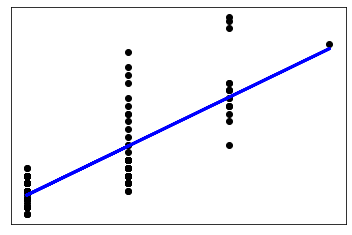

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
train_x = train_x[train_x.subject_group == "Control"]
test_x = test_x[test_x.subject_group == "Control"]

train_LX = train_x [['MED_VDAC1']]
train_LY = train_x [['MED_COX4+4L2']]

test_LX = test_x [['MED_VDAC1']]
test_LY = test_x [['MED_COX4+4L2']]

reg = LinearRegression().fit(train_LX, train_LY)



test_pred = reg.predict(test_LX)
train_pred = reg.predict(train_LX)

# Plot outputs
plt.scatter(test_LX, test_LY,  color='black')
plt.plot(test_LX, test_pred, color='blue', linewidth=3)

#plt.scatter(train_LX, train_LY,  color='black')
#plt.plot(train_LX, train_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


### Random Forest

In [206]:
clf = RandomForestClassifier(n_jobs=10 , random_state=0)
clf.fit(train_x, train_y)

C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=10, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [207]:
clf.predict(test_x)

array(['Control', 'Control', 'Control', ..., 'CI', 'MT-TL1', 'CI'],
      dtype=object)

In [208]:
print(classification_report(test_y, clf.predict(test_x)))

              precision    recall  f1-score   support

          CI       0.50      0.97      0.66       232
     Control       0.98      0.85      0.91       289
    Deletion       0.08      0.01      0.02       879
       MT-TE       0.00      0.00      0.00         0
       MT-TG       0.00      0.00      0.00         0
      MT-TL1       0.12      0.04      0.06       755
       MT-TW       0.00      0.00      0.00         0

    accuracy                           0.24      2155
   macro avg       0.24      0.27      0.24      2155
weighted avg       0.26      0.24      0.22      2155



C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
importances = clf.feature_importances_

Feature ranking:
1. feature 0 Area (0.165123)
2. feature 2 Circularity (0.127279)
3. feature 8 MED_COX4+4L2 (0.123038)
4. feature 1 MED_MTCO1 (0.110632)
5. feature 7 MED_NDUFA13 (0.106969)
6. feature 10 MED_NDUFB8 (0.102998)
7. feature 6 MED_OSCP (0.102100)
8. feature 9 MED_SDHA (0.048959)
9. feature 5 MED_UqCRC2 (0.046715)
10. feature 3 MED_VDAC1 (0.034272)
11. feature 4 Perimeter (0.031914)


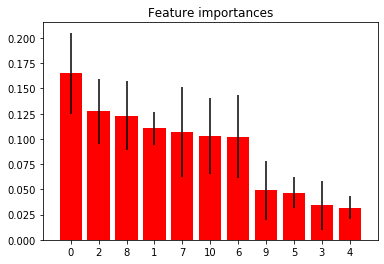

In [210]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], train_x.columns[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

## XGBoost

In [137]:
import xgboost as xgb


In [138]:
dfxg = df.drop(['colour','cell_id'],1)

X_train = dfxg[(dfxg.patient_id != "P02") & (dfxg.patient_id != "P04") & (dfxg.patient_id != "P07") & (dfxg.patient_id != "C02") ]
X_train

,patient_type,subject_group,patient_id,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord,RADIUS_COX4+4L2,THETA_COX4+4L2,RADIUS_MTCO1,THETA_MTCO1,RADIUS_NDUFA13,THETA_NDUFA13,RADIUS_NDUFB8,THETA_NDUFB8,RADIUS_OSCP,THETA_OSCP,RADIUS_SDHA,THETA_SDHA,RADIUS_UqCRC2,THETA_UqCRC2
0,control,Control,C01,879.0,0.448980,4.926230,0.667624,3.528312,1.512562,1.718303,1.926028,2.092291,2.498110,2.793981,1.574617,4.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.737705,2.122951,2.409836,2.573770,128.627417,3.131148,3.377049,1.778689,704.0,1710.0,3.863730,65.949721,2.183407,43.848458,2.330662,47.498496,2.487771,50.732414,2.618607,53.035596,2.952960,57.775808,3.207140,60.595488
1,control,Control,C01,2556.0,0.876923,9.064356,0.662271,6.656274,1.763175,2.777602,2.671580,2.926415,4.195481,4.720006,1.753394,7.0,2.0,3.0,3.0,3.0,4.0,5.0,2.0,2.143564,3.608911,3.301980,3.752475,220.225396,5.202970,5.737624,2.049505,717.0,1651.0,6.883341,75.242407,2.486600,45.159362,3.284732,57.737344,3.195580,56.722564,3.411495,59.071598,4.547137,67.318757,5.035161,69.620909
2,control,Control,C01,6432.0,0.800000,7.408696,0.484423,5.569829,1.652074,2.207175,2.160935,2.409333,3.632043,3.797937,1.552955,6.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,1.918841,2.739130,2.646377,2.968116,408.475175,4.539130,4.681159,1.791304,775.0,1647.0,5.782272,74.420706,2.267381,46.771375,2.698757,54.870020,2.661073,54.297107,2.866454,57.195878,3.950115,66.849875,4.103169,67.760627
3,control,Control,C01,3072.0,1.157143,8.756881,0.608063,7.275473,1.843152,2.923391,2.566386,2.976915,4.496332,4.825183,1.750554,8.0,2.0,3.0,3.0,3.0,5.0,5.0,2.0,2.165138,3.577982,3.077982,3.550459,251.965509,5.399083,5.678899,2.045872,731.0,1595.0,7.483111,76.471208,2.541977,46.475998,3.407441,59.086436,3.106569,55.701766,3.453471,59.542647,4.825084,68.727580,5.132916,70.059467
4,control,Control,C01,8734.5,1.595238,5.994460,0.705084,4.253457,1.421162,1.760127,1.769816,2.003908,2.789748,2.704791,1.469509,4.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,1.617729,2.227147,2.160665,2.509695,394.551296,3.684211,3.498615,1.692521,905.0,1570.0,4.500150,70.940694,2.044299,44.041803,2.292925,50.141895,2.300370,50.296555,2.484976,53.746603,3.153118,62.221833,3.078206,61.484830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,patient,MT-TW,P10,1858.0,2.000000,8.157025,0.240837,6.455170,1.407893,1.904649,1.519806,10.240695,13.661039,10.582099,2.976675,7.0,1.0,2.0,1.0,11.0,15.0,10.0,3.0,1.574380,2.371901,1.768595,12.285124,311.362478,16.578512,12.888430,3.611570,1135.0,91.0,7.108432,65.244141,3.292834,25.312990,3.533876,32.613470,3.342215,27.047567,10.664541,73.792376,13.981580,77.707662,10.992789,74.289058
8182,patient,MT-TW,P10,3970.5,1.451613,8.354244,0.409971,7.325609,1.150830,1.477179,1.191700,21.188446,44.385100,14.004130,5.544963,8.0,1.0,1.0,1.0,23.0,47.0,15.0,6.0,1.210332,1.638376,1.291513,24.623616,348.859952,49.250923,16.025830,6.483395,910.0,88.0,9.187554,52.876878,5.663128,11.724998,5.738351,14.917162,5.671575,12.129266,21.901983,75.334721,44.730121,82.879019,15.061948,68.398813
8183,patient,MT-TW,P10,1458.0,2.900000,13.741228,0.198452,11.432586,1.307792,1.628173,1.312751,40.187626,63.152782,28.195734,9.497522,12.0,1.0,1.0,1.0,41.0,62.0,30.0,10.0,1.434211,1.925439,1.434211,48.171053,303.847760,73.495614,32.982456,11.657895,1004.0,63.0,14.862939,50.282186,9.587139,7.840222,9.636071,9.727733,9.587817,7.869584,41.294651,76.703281,63.862953,81.447404,29.752350,71.384287
8184,patient,MT-TW,P10,1276.5,3.133333,15.060748,0.228461,13.320255,1.817468,3.064791,2.606018,4.084146,5.848844,8.787500,2.405839,14.0,2.0,3.0,3.0,4.0,6.0,9.0,2.0,2.135514,3.644860,3.056075,5.051402,264.977702,7.032710,10.261682,2

In [139]:
X_test = dfxg[(dfxg.patient_id == "P02") | (dfxg.patient_id == "P04") | (dfxg.patient_id == "P07") | (dfxg.patient_id == "C02") ]
X_test

,patient_type,subject_group,patient_id,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord,RADIUS_COX4+4L2,THETA_COX4+4L2,RADIUS_MTCO1,THETA_MTCO1,RADIUS_NDUFA13,THETA_NDUFA13,RADIUS_NDUFB8,THETA_NDUFB8,RADIUS_OSCP,THETA_OSCP,RADIUS_SDHA,THETA_SDHA,RADIUS_UqCRC2,THETA_UqCRC2
148,control,Control,C02,2042.0,1.142857,4.187500,0.710195,3.564187,1.347232,1.688322,1.639983,1.830259,2.946643,2.206121,1.150101,4.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.465909,1.977273,1.869318,2.125000,190.083260,3.403409,2.710227,1.221591,239.0,2417.0,3.745151,72.116019,1.771374,49.513386,2.042832,55.736940,2.003066,54.958470,2.161615,57.855515,3.163137,68.678865,2.487911,62.465953
149,control,Control,C02,7484.5,1.028037,3.857567,0.658222,3.049228,1.285727,1.571213,1.545592,1.600487,2.919352,2.049436,1.123039,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,1.406528,1.807122,1.780415,1.878338,378.007139,3.664688,2.433234,1.181009,131.0,2422.0,3.249463,69.781103,1.707136,48.863886,1.931302,54.444345,1.910516,53.997551,1.955192,54.943190,3.127912,68.958869,2.336965,61.278362
150,control,Control,C02,2209.5,1.339623,7.145078,0.565509,6.292220,1.672767,2.761243,2.494621,2.510010,5.505907,3.357623,1.444595,7.0,2.0,3.0,3.0,3.0,6.0,4.0,1.0,1.891192,3.222798,2.891192,2.937824,221.580733,6.227979,3.974093,1.637306,1074.0,2375.0,6.455919,77.069862,2.210204,49.186245,3.116299,62.382867,2.882705,59.925561,2.896032,60.078133,5.692264,75.298571,3.655200,66.720536
151,control,Control,C02,1914.5,1.014085,4.882629,0.409418,3.982579,1.351689,1.668886,1.539527,1.781770,2.904762,1.943744,1.315903,5.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0,1.478873,1.943662,1.760563,2.065728,242.409161,3.478873,2.305164,1.431925,3882.0,2373.0,4.194346,71.715678,1.886442,45.768569,2.125272,51.744498,2.025277,49.478000,2.215018,53.552750,3.188925,65.628716,2.347284,55.902224
152,control,Control,C02,3116.0,1.509091,5.523364,0.691137,4.730918,1.498402,2.539436,2.131998,2.258367,4.256661,2.843671,1.447180,5.0,1.0,3.0,2.0,2.0,4.0,3.0,1.0,1.668224,2.925234,2.448598,2.556075,238.024384,4.957944,3.392523,1.598131,898.0,2350.0,4.947313,72.991214,2.083156,45.996241,2.922852,60.321948,2.576770,55.831708,2.682266,57.347927,4.495942,71.222992,3.190736,63.027883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,patient,MT-TL1,P07,3126.0,0.491228,17.205263,0.133702,15.596919,2.387247,3.796447,3.470032,4.044455,9.893870,9.273631,2.283728,17.0,2.5,4.0,4.0,4.0,10.0,9.0,2.0,2.773684,4.531579,4.068421,4.773684,542.038665,11.052632,10.221053,2.681579,756.0,186.0,15.763226,81.669848,3.303689,46.269592,4.430398,58.971268,4.154099,56.649940,4.644677,60.548472,10.154018,77.002487,9.550688,76.165596
6006,patient,MT-TL1,P07,2509.5,0.851351,18.671141,0.177851,16.744694,2.566333,5.422774,4.713465,6.018156,12.499750,10.412195,2.749745,18.0,3.0,6.0,5.0,6.0,14.0,12.0,3.0,3.016779,6.412752,5.516779,6.966443,421.085348,14.144295,12.382550,3.181208,803.0,141.0,16.968968,80.674354,3.761271,43.023992,6.080097,63.111640,5.456909,59.741530,6.616593,65.443948,12.798627,77.593454,10.769165,75.206559
6007,patient,MT-TL1,P07,949.0,1.096154,26.759494,0.109421,24.725803,2.748354,1.995762,1.228751,25.582678,42.498867,35.981880,5.400296,24.0,3.0,2.0,1.0,27.0,42.0,38.0,6.0,3.270042,2.337553,1.320675,27.628692,330.132031,46.776371,38.864979,6.164557,964.0,120.0,25.308665,77.679653,6.059426,26.972753,5.757279,20.282566,5.538323,12.818499,26.146445,78.080316,42.840599,82.758283,36.384872,81.464541
6008,patient,MT-TL1,P07,1456.5,1.200000,8.957447,0.188743,7.531001,1.701451,1.839044,1.503479,6.003102,17.272200,9.580587,2.304492,8.0,2.0,2.0,1.0,6.0,18.0,10.0,2.0,1.970213,2.306383,1.765957,7.191489,311.404109,19.153

In [140]:
#train_x = X_train[['Area',  'Perimeter', 'Circularity', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1'  ]]
train_x = X_train.drop(['patient_id','patient_type','subject_group', 'AspectRatio','xCoord','yCoord', 'RADIUS_COX4+4L2','THETA_COX4+4L2','RADIUS_MTCO1','THETA_MTCO1','RADIUS_NDUFA13','THETA_NDUFA13','RADIUS_NDUFB8','THETA_NDUFB8','RADIUS_OSCP','THETA_OSCP','RADIUS_SDHA','THETA_SDHA','RADIUS_UqCRC2','THETA_UqCRC2' ,  'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1','MTCO1', 'COX4+4L2', 'NDUFA13', 'NDUFB8', 'OSCP', 'SDHA', 'UqCRC2', 'VDAC1'],1)
train_y = X_train[['subject_group']]

#test_x =X_test[['Area', 'Perimeter', 'Circularity', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1'  ]]
test_x =X_test.drop(['patient_id','patient_type','subject_group', 'AspectRatio','xCoord','yCoord', 'RADIUS_COX4+4L2','THETA_COX4+4L2','RADIUS_MTCO1','THETA_MTCO1','RADIUS_NDUFA13','THETA_NDUFA13','RADIUS_NDUFB8','THETA_NDUFB8','RADIUS_OSCP','THETA_OSCP','RADIUS_SDHA','THETA_SDHA','RADIUS_UqCRC2','THETA_UqCRC2', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1' ,'COX4+4L2','MTCO1', 'NDUFA13', 'NDUFB8', 'OSCP', 'SDHA', 'UqCRC2', 'VDAC1'],1)
test_y =X_test[['subject_group']]

In [112]:
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(train_x, train_y)

C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.

In [141]:
grid.predict(test_x)

array(['Control', 'Control', 'Control', ..., 'CI', 'MT-TL1', 'CI'],
      dtype=object)

In [142]:
print(classification_report(test_y, grid.predict(test_x)))

              precision    recall  f1-score   support

          CI       0.53      0.97      0.69       232
     Control       0.98      0.80      0.88       289
    Deletion       0.04      0.01      0.01       879
       MT-TE       0.00      0.00      0.00         0
       MT-TG       0.00      0.00      0.00         0
      MT-TL1       0.17      0.05      0.08       755
       MT-TW       0.00      0.00      0.00         0

    accuracy                           0.23      2155
   macro avg       0.25      0.26      0.24      2155
weighted avg       0.27      0.23      0.23      2155



C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:

print(grid.best_estimator_.feature_importances_)

[0.08989233 0.05208931 0.08930474 0.08719284 0.088425   0.0929186
 0.15453173 0.0886588  0.0914351  0.08704769 0.07850391]


In [144]:
importances = grid.best_estimator_.feature_importances_

Feature ranking:
1. feature 6 Area (0.154532)
2. feature 5 Circularity (0.092919)
3. feature 8 MED_COX4+4L2 (0.091435)
4. feature 0 MED_MTCO1 (0.089892)
5. feature 2 MED_NDUFA13 (0.089305)
6. feature 7 MED_NDUFB8 (0.088659)
7. feature 4 MED_OSCP (0.088425)
8. feature 3 MED_SDHA (0.087193)
9. feature 9 MED_UqCRC2 (0.087048)
10. feature 10 MED_VDAC1 (0.078504)
11. feature 1 Perimeter (0.052089)


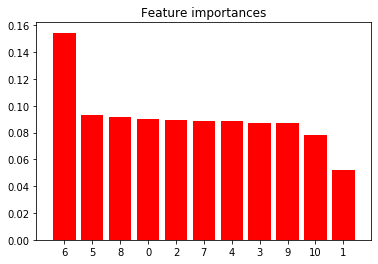

In [146]:
#std = np.std([grid.best_estimator_.feature_importances_ for tree in grid.best_estimator_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], train_x.columns[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

## Logistic Regression 

In [151]:
from sklearn.linear_model import LogisticRegression


In [152]:
dfxg = df.drop(['colour','cell_id'],1)

X_train = dfxg[(dfxg.patient_id != "P02") & (dfxg.patient_id != "P04") & (dfxg.patient_id != "P07") & (dfxg.patient_id != "C02") ]
X_train

,patient_type,subject_group,patient_id,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord,RADIUS_COX4+4L2,THETA_COX4+4L2,RADIUS_MTCO1,THETA_MTCO1,RADIUS_NDUFA13,THETA_NDUFA13,RADIUS_NDUFB8,THETA_NDUFB8,RADIUS_OSCP,THETA_OSCP,RADIUS_SDHA,THETA_SDHA,RADIUS_UqCRC2,THETA_UqCRC2
0,control,Control,C01,879.0,0.448980,4.926230,0.667624,3.528312,1.512562,1.718303,1.926028,2.092291,2.498110,2.793981,1.574617,4.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.737705,2.122951,2.409836,2.573770,128.627417,3.131148,3.377049,1.778689,704.0,1710.0,3.863730,65.949721,2.183407,43.848458,2.330662,47.498496,2.487771,50.732414,2.618607,53.035596,2.952960,57.775808,3.207140,60.595488
1,control,Control,C01,2556.0,0.876923,9.064356,0.662271,6.656274,1.763175,2.777602,2.671580,2.926415,4.195481,4.720006,1.753394,7.0,2.0,3.0,3.0,3.0,4.0,5.0,2.0,2.143564,3.608911,3.301980,3.752475,220.225396,5.202970,5.737624,2.049505,717.0,1651.0,6.883341,75.242407,2.486600,45.159362,3.284732,57.737344,3.195580,56.722564,3.411495,59.071598,4.547137,67.318757,5.035161,69.620909
2,control,Control,C01,6432.0,0.800000,7.408696,0.484423,5.569829,1.652074,2.207175,2.160935,2.409333,3.632043,3.797937,1.552955,6.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,1.918841,2.739130,2.646377,2.968116,408.475175,4.539130,4.681159,1.791304,775.0,1647.0,5.782272,74.420706,2.267381,46.771375,2.698757,54.870020,2.661073,54.297107,2.866454,57.195878,3.950115,66.849875,4.103169,67.760627
3,control,Control,C01,3072.0,1.157143,8.756881,0.608063,7.275473,1.843152,2.923391,2.566386,2.976915,4.496332,4.825183,1.750554,8.0,2.0,3.0,3.0,3.0,5.0,5.0,2.0,2.165138,3.577982,3.077982,3.550459,251.965509,5.399083,5.678899,2.045872,731.0,1595.0,7.483111,76.471208,2.541977,46.475998,3.407441,59.086436,3.106569,55.701766,3.453471,59.542647,4.825084,68.727580,5.132916,70.059467
4,control,Control,C01,8734.5,1.595238,5.994460,0.705084,4.253457,1.421162,1.760127,1.769816,2.003908,2.789748,2.704791,1.469509,4.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,1.617729,2.227147,2.160665,2.509695,394.551296,3.684211,3.498615,1.692521,905.0,1570.0,4.500150,70.940694,2.044299,44.041803,2.292925,50.141895,2.300370,50.296555,2.484976,53.746603,3.153118,62.221833,3.078206,61.484830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,patient,MT-TW,P10,1858.0,2.000000,8.157025,0.240837,6.455170,1.407893,1.904649,1.519806,10.240695,13.661039,10.582099,2.976675,7.0,1.0,2.0,1.0,11.0,15.0,10.0,3.0,1.574380,2.371901,1.768595,12.285124,311.362478,16.578512,12.888430,3.611570,1135.0,91.0,7.108432,65.244141,3.292834,25.312990,3.533876,32.613470,3.342215,27.047567,10.664541,73.792376,13.981580,77.707662,10.992789,74.289058
8182,patient,MT-TW,P10,3970.5,1.451613,8.354244,0.409971,7.325609,1.150830,1.477179,1.191700,21.188446,44.385100,14.004130,5.544963,8.0,1.0,1.0,1.0,23.0,47.0,15.0,6.0,1.210332,1.638376,1.291513,24.623616,348.859952,49.250923,16.025830,6.483395,910.0,88.0,9.187554,52.876878,5.663128,11.724998,5.738351,14.917162,5.671575,12.129266,21.901983,75.334721,44.730121,82.879019,15.061948,68.398813
8183,patient,MT-TW,P10,1458.0,2.900000,13.741228,0.198452,11.432586,1.307792,1.628173,1.312751,40.187626,63.152782,28.195734,9.497522,12.0,1.0,1.0,1.0,41.0,62.0,30.0,10.0,1.434211,1.925439,1.434211,48.171053,303.847760,73.495614,32.982456,11.657895,1004.0,63.0,14.862939,50.282186,9.587139,7.840222,9.636071,9.727733,9.587817,7.869584,41.294651,76.703281,63.862953,81.447404,29.752350,71.384287
8184,patient,MT-TW,P10,1276.5,3.133333,15.060748,0.228461,13.320255,1.817468,3.064791,2.606018,4.084146,5.848844,8.787500,2.405839,14.0,2.0,3.0,3.0,4.0,6.0,9.0,2.0,2.135514,3.644860,3.056075,5.051402,264.977702,7.032710,10.261682,2

In [153]:
X_test = dfxg[(dfxg.patient_id == "P02") | (dfxg.patient_id == "P04") | (dfxg.patient_id == "P07") | (dfxg.patient_id == "C02") ]
X_test

,patient_type,subject_group,patient_id,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord,RADIUS_COX4+4L2,THETA_COX4+4L2,RADIUS_MTCO1,THETA_MTCO1,RADIUS_NDUFA13,THETA_NDUFA13,RADIUS_NDUFB8,THETA_NDUFB8,RADIUS_OSCP,THETA_OSCP,RADIUS_SDHA,THETA_SDHA,RADIUS_UqCRC2,THETA_UqCRC2
148,control,Control,C02,2042.0,1.142857,4.187500,0.710195,3.564187,1.347232,1.688322,1.639983,1.830259,2.946643,2.206121,1.150101,4.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.465909,1.977273,1.869318,2.125000,190.083260,3.403409,2.710227,1.221591,239.0,2417.0,3.745151,72.116019,1.771374,49.513386,2.042832,55.736940,2.003066,54.958470,2.161615,57.855515,3.163137,68.678865,2.487911,62.465953
149,control,Control,C02,7484.5,1.028037,3.857567,0.658222,3.049228,1.285727,1.571213,1.545592,1.600487,2.919352,2.049436,1.123039,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,1.406528,1.807122,1.780415,1.878338,378.007139,3.664688,2.433234,1.181009,131.0,2422.0,3.249463,69.781103,1.707136,48.863886,1.931302,54.444345,1.910516,53.997551,1.955192,54.943190,3.127912,68.958869,2.336965,61.278362
150,control,Control,C02,2209.5,1.339623,7.145078,0.565509,6.292220,1.672767,2.761243,2.494621,2.510010,5.505907,3.357623,1.444595,7.0,2.0,3.0,3.0,3.0,6.0,4.0,1.0,1.891192,3.222798,2.891192,2.937824,221.580733,6.227979,3.974093,1.637306,1074.0,2375.0,6.455919,77.069862,2.210204,49.186245,3.116299,62.382867,2.882705,59.925561,2.896032,60.078133,5.692264,75.298571,3.655200,66.720536
151,control,Control,C02,1914.5,1.014085,4.882629,0.409418,3.982579,1.351689,1.668886,1.539527,1.781770,2.904762,1.943744,1.315903,5.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0,1.478873,1.943662,1.760563,2.065728,242.409161,3.478873,2.305164,1.431925,3882.0,2373.0,4.194346,71.715678,1.886442,45.768569,2.125272,51.744498,2.025277,49.478000,2.215018,53.552750,3.188925,65.628716,2.347284,55.902224
152,control,Control,C02,3116.0,1.509091,5.523364,0.691137,4.730918,1.498402,2.539436,2.131998,2.258367,4.256661,2.843671,1.447180,5.0,1.0,3.0,2.0,2.0,4.0,3.0,1.0,1.668224,2.925234,2.448598,2.556075,238.024384,4.957944,3.392523,1.598131,898.0,2350.0,4.947313,72.991214,2.083156,45.996241,2.922852,60.321948,2.576770,55.831708,2.682266,57.347927,4.495942,71.222992,3.190736,63.027883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,patient,MT-TL1,P07,3126.0,0.491228,17.205263,0.133702,15.596919,2.387247,3.796447,3.470032,4.044455,9.893870,9.273631,2.283728,17.0,2.5,4.0,4.0,4.0,10.0,9.0,2.0,2.773684,4.531579,4.068421,4.773684,542.038665,11.052632,10.221053,2.681579,756.0,186.0,15.763226,81.669848,3.303689,46.269592,4.430398,58.971268,4.154099,56.649940,4.644677,60.548472,10.154018,77.002487,9.550688,76.165596
6006,patient,MT-TL1,P07,2509.5,0.851351,18.671141,0.177851,16.744694,2.566333,5.422774,4.713465,6.018156,12.499750,10.412195,2.749745,18.0,3.0,6.0,5.0,6.0,14.0,12.0,3.0,3.016779,6.412752,5.516779,6.966443,421.085348,14.144295,12.382550,3.181208,803.0,141.0,16.968968,80.674354,3.761271,43.023992,6.080097,63.111640,5.456909,59.741530,6.616593,65.443948,12.798627,77.593454,10.769165,75.206559
6007,patient,MT-TL1,P07,949.0,1.096154,26.759494,0.109421,24.725803,2.748354,1.995762,1.228751,25.582678,42.498867,35.981880,5.400296,24.0,3.0,2.0,1.0,27.0,42.0,38.0,6.0,3.270042,2.337553,1.320675,27.628692,330.132031,46.776371,38.864979,6.164557,964.0,120.0,25.308665,77.679653,6.059426,26.972753,5.757279,20.282566,5.538323,12.818499,26.146445,78.080316,42.840599,82.758283,36.384872,81.464541
6008,patient,MT-TL1,P07,1456.5,1.200000,8.957447,0.188743,7.531001,1.701451,1.839044,1.503479,6.003102,17.272200,9.580587,2.304492,8.0,2.0,2.0,1.0,6.0,18.0,10.0,2.0,1.970213,2.306383,1.765957,7.191489,311.404109,19.153

In [154]:
#train_x = X_train[['Area',  'Perimeter', 'Circularity', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1'  ]]
train_x = X_train.drop(['patient_id','patient_type','subject_group', 'AspectRatio','xCoord','yCoord', 'RADIUS_COX4+4L2','THETA_COX4+4L2','RADIUS_MTCO1','THETA_MTCO1','RADIUS_NDUFA13','THETA_NDUFA13','RADIUS_NDUFB8','THETA_NDUFB8','RADIUS_OSCP','THETA_OSCP','RADIUS_SDHA','THETA_SDHA','RADIUS_UqCRC2','THETA_UqCRC2' ,  'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1','MTCO1', 'COX4+4L2', 'NDUFA13', 'NDUFB8', 'OSCP', 'SDHA', 'UqCRC2', 'VDAC1'],1)
train_y = X_train[['subject_group']]

#test_x =X_test[['Area', 'Perimeter', 'Circularity', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1'  ]]
test_x =X_test.drop(['patient_id','patient_type','subject_group', 'AspectRatio','xCoord','yCoord', 'RADIUS_COX4+4L2','THETA_COX4+4L2','RADIUS_MTCO1','THETA_MTCO1','RADIUS_NDUFA13','THETA_NDUFA13','RADIUS_NDUFB8','THETA_NDUFB8','RADIUS_OSCP','THETA_OSCP','RADIUS_SDHA','THETA_SDHA','RADIUS_UqCRC2','THETA_UqCRC2', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1' ,'COX4+4L2','MTCO1', 'NDUFA13', 'NDUFB8', 'OSCP', 'SDHA', 'UqCRC2', 'VDAC1'],1)
test_y =X_test[['subject_group']]

In [155]:
clf = LogisticRegression(random_state=0).fit(train_x, train_y)

C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [156]:
print(classification_report(test_y, clf.predict(test_x)))

              precision    recall  f1-score   support

          CI       0.67      0.63      0.65       232
     Control       0.82      0.64      0.72       289
    Deletion       0.59      0.32      0.42       879
       MT-TE       0.00      0.00      0.00         0
       MT-TG       0.00      0.00      0.00         0
      MT-TL1       0.12      0.08      0.10       755
       MT-TW       0.00      0.00      0.00         0

    accuracy                           0.32      2155
   macro avg       0.31      0.24      0.27      2155
weighted avg       0.46      0.32      0.37      2155



C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature: 0, Score: -0.00216
Feature: 1, Score: -0.00204
Feature: 2, Score: 0.11349
Feature: 3, Score: 0.00944
Feature: 4, Score: -0.01571
Feature: 5, Score: -0.01456
Feature: 6, Score: 0.02355
Feature: 7, Score: 0.02865
Feature: 8, Score: 0.05651
Feature: 9, Score: -0.00569
Feature: 10, Score: 0.01883


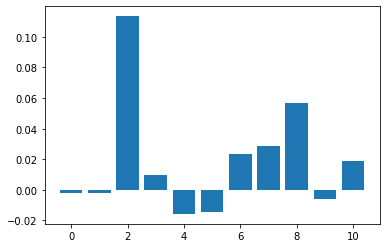

In [159]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature ranking:
1. feature 2 Area (0.113492)
2. feature 8 Circularity (0.056507)
3. feature 7 MED_COX4+4L2 (0.028655)
4. feature 6 MED_MTCO1 (0.023554)
5. feature 10 MED_NDUFA13 (0.018825)
6. feature 3 MED_NDUFB8 (0.009436)
7. feature 1 MED_OSCP (-0.002037)
8. feature 0 MED_SDHA (-0.002158)
9. feature 9 MED_UqCRC2 (-0.005688)
10. feature 5 MED_VDAC1 (-0.014557)
11. feature 4 Perimeter (-0.015711)


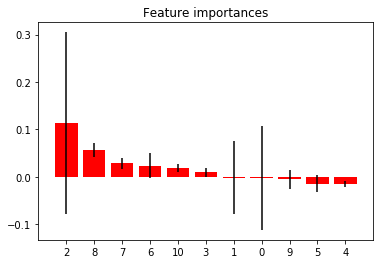

In [162]:
indices = np.argsort(importance)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], train_x.columns[f], importance[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importance[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

## Predicting Patient IDs

In [211]:
X = df[['Area', 'Perimeter', 'Circularity', 'MED_COX4+4L2','MED_MTCO1', 'MED_NDUFA13', 'MED_NDUFB8', 'MED_OSCP', 'MED_SDHA', 'MED_UqCRC2', 'MED_VDAC1'  ]]
labels = df[['patient_id']]

In [212]:
train_x, test_x, train_y,test_y = train_test_split(X,labels, train_size=.75)
print("Train X: {} | Train Y: {}".format(train_x.shape,train_y.shape))
print("Test X:  {} | Test Y:  {}".format(test_x.shape,test_y.shape))

Train X: (6139, 11) | Train Y: (6139, 1)
Test X:  (2047, 11) | Test Y:  (2047, 1)


In [213]:
clf = RandomForestClassifier(n_jobs=10 , random_state=0)
clf.fit(train_x, train_y)

clf.predict(test_x)

C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array(['P09', 'P01', 'P07', ..., 'P02', 'P10', 'P03'], dtype=object)

In [214]:
print(classification_report(test_y, clf.predict(test_x)))

              precision    recall  f1-score   support

         C01       0.70      0.76      0.73        37
         C02       0.89      0.92      0.91        90
         C03       0.89      0.92      0.91        26
         P01       0.95      0.92      0.93        84
         P02       0.98      0.90      0.93        48
         P03       0.83      0.86      0.85       338
         P04       0.92      0.93      0.92       224
         P05       0.86      0.93      0.90       480
         P07       0.85      0.89      0.87       193
         P08       0.95      0.85      0.90       148
         P09       0.85      0.77      0.81       238
         P10       0.90      0.73      0.80       141

    accuracy                           0.87      2047
   macro avg       0.88      0.87      0.87      2047
weighted avg       0.87      0.87      0.87      2047



In [215]:
importances = clf.feature_importances_

Feature ranking:
1. feature 0 Area (0.149669)
2. feature 2 Perimeter (0.132963)
3. feature 1 Circularity (0.118002)
4. feature 3 MED_COX4+4L2 (0.117533)
5. feature 9 MED_MTCO1 (0.104759)
6. feature 8 MED_NDUFA13 (0.102242)
7. feature 7 MED_NDUFB8 (0.082431)
8. feature 6 MED_OSCP (0.052624)
9. feature 4 MED_SDHA (0.048650)
10. feature 5 MED_UqCRC2 (0.046759)
11. feature 10 MED_VDAC1 (0.044367)


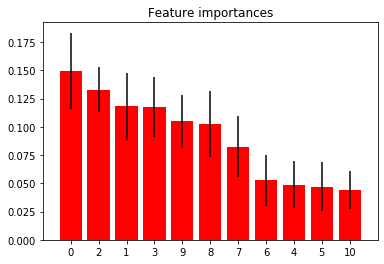

In [216]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

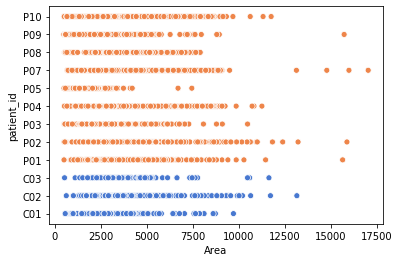

In [238]:
ax = sns.scatterplot(x="Area", y="patient_id", hue="patient_type", palette='muted',legend=False,data=df_eda)

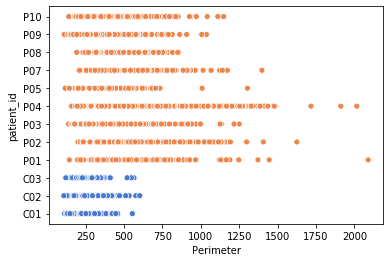

In [239]:
ax = sns.scatterplot(x="Perimeter", y="patient_id", hue="patient_type", palette='muted',legend=False,data=df_eda)

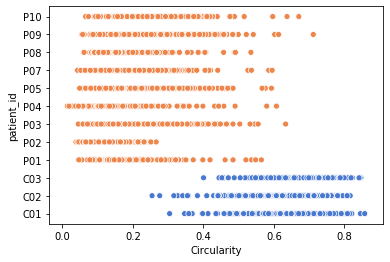

In [240]:
ax = sns.scatterplot(x="Circularity", y="patient_id", hue="patient_type", palette='muted',legend=False,data=df_eda)

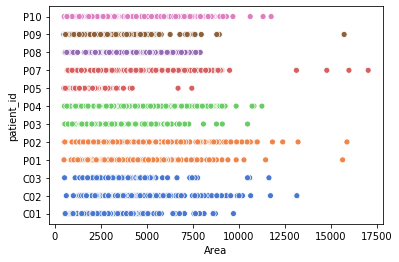

In [241]:
ax = sns.scatterplot(x="Area", y="patient_id", hue="subject_group", palette='muted',legend=False,data=df_eda)

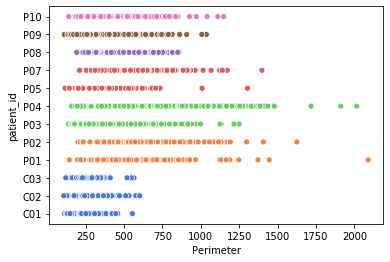

In [242]:
ax = sns.scatterplot(x="Perimeter", y="patient_id", hue="subject_group", palette='muted',legend=False,data=df_eda)

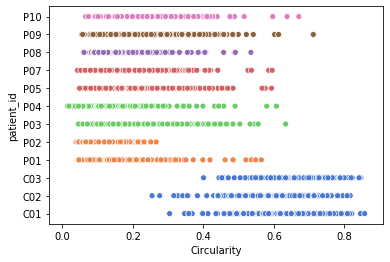

In [243]:
ax = sns.scatterplot(x="Circularity", y="patient_id", hue="subject_group", palette='muted',legend=False,data=df_eda)

## Clustering based ML 

In [86]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from time import time
from mpl_toolkits.mplot3d import Axes3D

df_cml = df

X = df_cml[['Area', 'AspectRatio', 'Perimeter', 'Circularity', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1'  ]]
labels = df_cml[['patient_type']]

labels.patient_type = labels.patient_type.astype("category")
labels.patient_type = labels.patient_type.cat.codes
labels.patient_type = labels.patient_type.astype("int")

cls = KMeans(n_clusters = 2)
cls.fit(X)

C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Predictions')

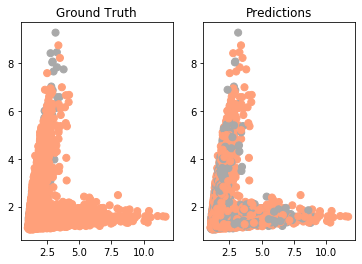

In [87]:
color_theme = np.array(['darkgray', 'lightsalmon','powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=X.LOG_VDAC1, y=X.LOG_NDUFA13 , c=color_theme[labels.patient_type], s=50 )
plt.title('Ground Truth')

plt.subplot(1,2,2)
plt.scatter(x=X.LOG_VDAC1, y=X.LOG_NDUFA13 , c=color_theme[cls.labels_], s=50 )
plt.title('Predictions')


In [88]:
sample_size = len(X)
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels.patient_type, estimator.labels_),
             metrics.completeness_score(labels.patient_type, estimator.labels_),
             metrics.v_measure_score(labels.patient_type, estimator.labels_),
             metrics.adjusted_rand_score(labels.patient_type, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels.patient_type,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=2, n_init=10),
              name="k-means++", data=X)

bench_k_means(KMeans(init='random', n_clusters=2, n_init=10),
              name="random", data=X)

k-means++	0.13s	18542082309	0.011	0.004	0.006	0.023	0.006	0.454
random   	0.09s	18542082309	0.011	0.004	0.006	0.023	0.006	0.454


### Feature Engineering

In [89]:
X = df_cml[['Area', 'AspectRatio', 'Perimeter', 'Circularity', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1'  ]]
labels = df_cml[['patient_type']]

labels.patient_type = labels.patient_type.astype("category")
labels.patient_type = labels.patient_type.cat.codes
labels.patient_type = labels.patient_type.astype("int")

cls = KMeans(n_clusters = 2)
cls.fit(X)

C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Predictions')

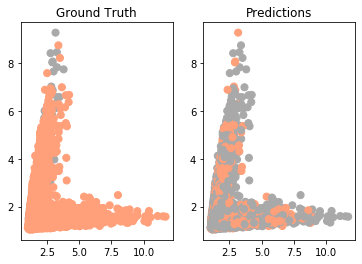

In [90]:
color_theme = np.array(['darkgray', 'lightsalmon','powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=X.LOG_VDAC1, y=X.LOG_NDUFA13 , c=color_theme[labels.patient_type], s=50 )
plt.title('Ground Truth')

plt.subplot(1,2,2)
plt.scatter(x=X.LOG_VDAC1, y=X.LOG_NDUFA13 , c=color_theme[cls.labels_], s=50 )
plt.title('Predictions')


In [91]:
print(classification_report(labels.patient_type,cls.labels_))

              precision    recall  f1-score   support

           0       0.06      0.52      0.10       568
           1       0.90      0.33      0.49      7618

    accuracy                           0.35      8186
   macro avg       0.48      0.43      0.29      8186
weighted avg       0.84      0.35      0.46      8186



### Using Polar dimensions

In [92]:
X = df_cml[['Area', 'AspectRatio', 'Perimeter', 'Circularity', 'THETA_COX4+4L2','THETA_MTCO1', 'THETA_NDUFA13', 'THETA_NDUFB8', 'THETA_OSCP', 'THETA_SDHA', 'THETA_UqCRC2'  ]]
labels = df_cml[['patient_type']]

labels.patient_type = labels.patient_type.astype("category")
labels.patient_type = labels.patient_type.cat.codes
labels.patient_type = labels.patient_type.astype("int")

cls = KMeans(n_clusters = 2)
cls.fit(X)




C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [93]:
print(classification_report(labels.patient_type,cls.labels_))

              precision    recall  f1-score   support

           0       0.05      0.52      0.10       568
           1       0.90      0.33      0.49      7618

    accuracy                           0.35      8186
   macro avg       0.48      0.43      0.29      8186
weighted avg       0.84      0.35      0.46      8186



### PCA

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

pca.fit(X)

X_pca = pca.transform(X)


In [95]:
labels = df_cml[['patient_type']]

labels.patient_type = labels.patient_type.astype("category")

labels.patient_type = labels.patient_type.cat.codes

labels.patient_type = labels.patient_type.astype("int")


cls = KMeans(n_clusters = 2)
cls.fit(X_pca)

C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [96]:
print(classification_report(labels.patient_type,cls.labels_))

              precision    recall  f1-score   support

           0       0.10      0.48      0.16       568
           1       0.95      0.67      0.78      7618

    accuracy                           0.65      8186
   macro avg       0.52      0.57      0.47      8186
weighted avg       0.89      0.65      0.74      8186



### using subject_group

In [97]:
labels = df_cml[['subject_group']]

labels.subject_group = labels.subject_group.astype("category")

labels.subject_group = labels.subject_group.cat.codes

labels.subject_group = labels.subject_group.astype("int")

cls = KMeans(n_clusters = 7)
cls.fit(X_pca)

C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [98]:
print(classification_report(labels.subject_group,cls.labels_))

              precision    recall  f1-score   support

           0       0.01      0.05      0.02       569
           1       0.11      0.32      0.16       568
           2       0.21      0.12      0.15      2240
           3       0.03      0.00      0.00       946
           4       0.05      0.02      0.03       628
           5       0.19      0.06      0.09      2633
           6       0.05      0.14      0.07       602

    accuracy                           0.09      8186
   macro avg       0.09      0.10      0.08      8186
weighted avg       0.14      0.09      0.09      8186



## GMM

In [99]:
from sklearn.mixture import GaussianMixture as GMM

X = df_cml[['Area', 'AspectRatio', 'Perimeter', 'Circularity', 'THETA_COX4+4L2','THETA_MTCO1', 'THETA_NDUFA13', 'THETA_NDUFB8', 'THETA_OSCP', 'THETA_SDHA', 'THETA_UqCRC2'  ]]
labels = df2[['patient_type']]

labels.patient_type = labels.patient_type.astype("category")
labels.patient_type = labels.patient_type.cat.codes
labels.patient_type = labels.patient_type.astype("int")

cls = GMM(n_components = 2)
cls.fit(X)

C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [100]:
predictLabels = cls.fit_predict(X,X)

print(classification_report(labels.patient_type,predictLabels))

              precision    recall  f1-score   support

           0       0.13      0.95      0.24       568
           1       0.99      0.54      0.70      7618

    accuracy                           0.57      8186
   macro avg       0.56      0.75      0.47      8186
weighted avg       0.93      0.57      0.67      8186



In [101]:
labels = df_cml[['subject_group']]

labels.subject_group = labels.subject_group.astype("category")

labels.subject_group = labels.subject_group.cat.codes

labels.subject_group = labels.subject_group.astype("int")

cls = GMM(n_components = 2)
cls.fit(X)

C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [102]:
predictLabels = cls.fit_predict(X,X)

print(classification_report(labels.subject_group,predictLabels))

              precision    recall  f1-score   support

           0       0.14      1.00      0.24       569
           1       0.13      0.95      0.24       568
           2       0.00      0.00      0.00      2240
           3       0.00      0.00      0.00       946
           4       0.00      0.00      0.00       628
           5       0.00      0.00      0.00      2633
           6       0.00      0.00      0.00       602

    accuracy                           0.14      8186
   macro avg       0.04      0.28      0.07      8186
weighted avg       0.02      0.14      0.03      8186



C:\Users\b6071289\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
